# **Preprocessing**

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
Negative_tweets=0
Positive_tweets=0
for label in df['label']:
  if(label==0):
    Negative_tweets+=1
  else:
    Positive_tweets+=1

print("Negative Tweets : ",Negative_tweets)
print("Positive Tweets : ",Positive_tweets)
print("Total Tweets : ",len(df["label"]))

Negative Tweets :  29720
Positive Tweets :  2242
Total Tweets :  31962


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


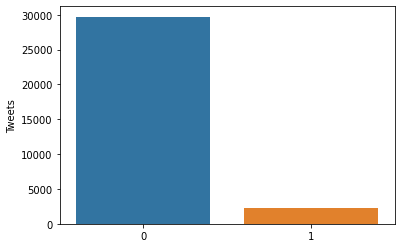

In [5]:
x=[0,1]
y=[Negative_tweets,Positive_tweets]
sns.barplot(x,y)
plt.ylabel("Tweets")
plt.show()

**Removing Twitter Handles**

In [6]:
combined=df

In [7]:
combined

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [9]:
# remove twitter handles
combined['tidy_tweet'] = np.vectorize(remove_pattern)(combined['tweet'], "@[\w]*")

**Removing Punctuations, Numbers, and Special Characters**

In [10]:
# remove special characters, numbers, punctuations
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
combined['tidy_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957    ate  isz that youuu                           ...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary  #wso...
31961                          thank you  for you follow  
Name: tidy_tweet, Length: 31962, dtype: object

**Tokenization**

In [12]:
tokenized_tweet = combined['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined['tidy_tweet'] = tokenized_tweet

**Visualization from Tweets**

**Understanding the common words used in the tweets**

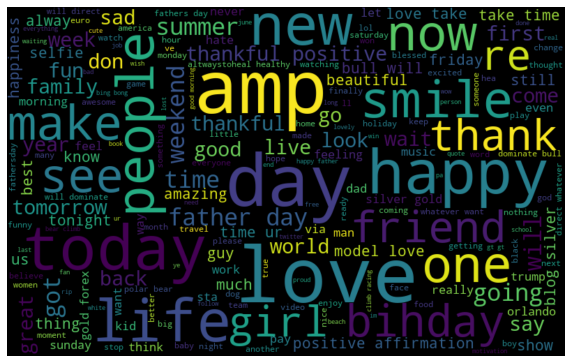

In [14]:
all_words = ' '.join([text for text in combined['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Common Words in Positive tweets**

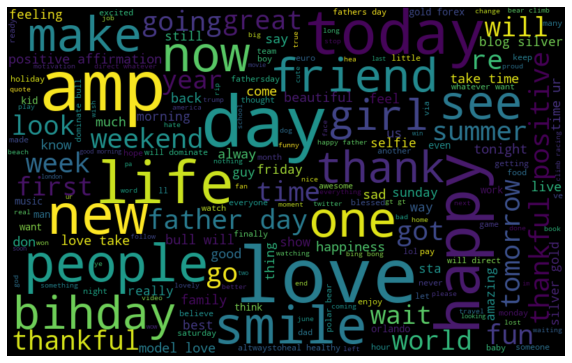

In [15]:
normal_words =' '.join([text for text in combined['tidy_tweet'][combined['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Negative Tweets**

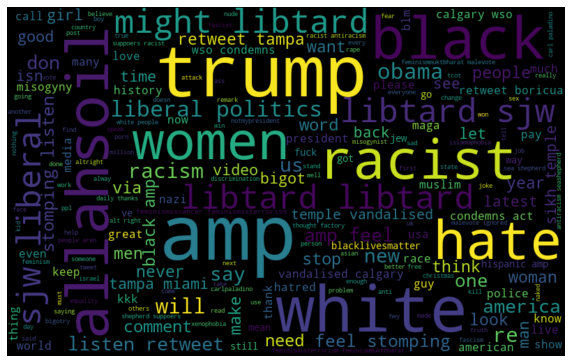

In [16]:

negative_words = ' '.join([text for text in combined['tidy_tweet'][combined['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Understanding the impact of Hashtags on tweets sentiment**

In [17]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    #For the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combined['tidy_tweet'][combined['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined['tidy_tweet'][combined['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Positive Tweets**

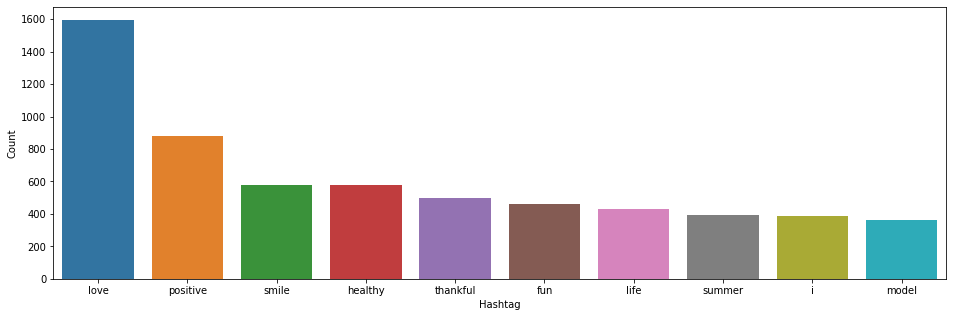

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Negative Tweets frequency barplot**

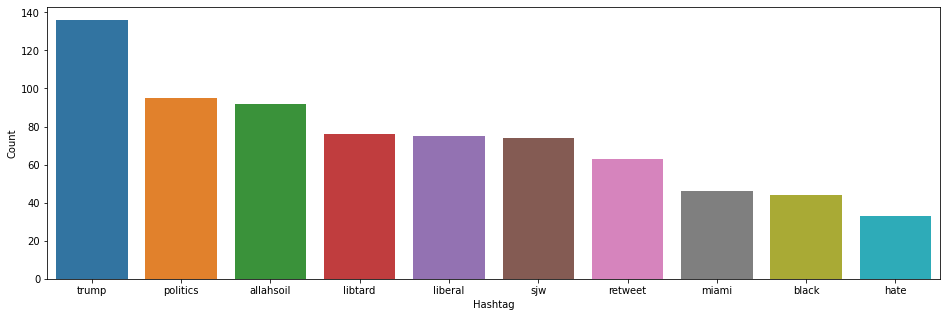

In [20]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Model Building: Sentiment Analysis**

**Extracting Features from Cleaned Tweets**

**Bag-of-Words Features**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english' )
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combined['tidy_tweet'])

In [22]:
np.shape(bow)

(31962, 1000)

**TF-IDF Features**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english' )
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combined['tidy_tweet'])

In [24]:
np.shape(tfidf)

(31962, 1000)

**Bag of Words**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5288135593220339

In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in yvalid:
  actual.append(i)
count = 0
for i in range(len(prediction_int)):
  if(prediction_int[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(prediction_int)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, prediction_int, pos_label=1)

cm = confusion_matrix(actual, prediction_int)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, prediction_int)
acc = accuracy_score(actual, prediction_int)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  94.20168943581186
AUC of the predictions: 0.7177389008737453
The report for the same is below: -
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.63      0.46      0.53       684

    accuracy                           0.94      9589
   macro avg       0.79      0.72      0.75      9589
weighted avg       0.94      0.94      0.94      9589

The confusion matrix for the same is below: -
[[8721  184]
 [ 372  312]]


In [27]:
train_tfidf = tfidf[:31962,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, df['label'], random_state=42, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5225863596102746

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in yvalid:
  actual.append(i)
count = 0
for i in range(len(prediction_int)):
  if(prediction_int[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(prediction_int)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, prediction_int, pos_label=1)

cm = confusion_matrix(actual, prediction_int)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, prediction_int)
acc = accuracy_score(actual, prediction_int)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  94.37897590989675
AUC of the predictions: 0.7072210401541943
The report for the same is below: -
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.66      0.43      0.52       684

    accuracy                           0.94      9589
   macro avg       0.81      0.71      0.75      9589
weighted avg       0.94      0.94      0.94      9589

The confusion matrix for the same is below: -
[[8755  150]
 [ 389  295]]


**Other Models**

In [29]:
df=pd.read_csv("train_E6oV3lV.csv")

In [30]:
df1 = df[:2000]

In [31]:
a = list(df1['label'])

In [32]:
sum(a)

145

In [33]:
df = df1

In [34]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [35]:
##To get Total Number of Tweets, Total Positive Tweets and Total Negative Tweets
nltk.download('punkt')

def word_vocab(document):
  data = document['tweet']
  words = [nltk.word_tokenize(word.lower()) for word in data] 
  wordsList = [item.strip() for sublist in words for item in sublist]
  return wordsList

def preprocess(document):
    #code goes here
  words = word_vocab(document)
  a=[]
  positiveCount =0
  negativeCount =0
  totalWordList = len(set(words)) 
  print("Total number of vocabulary number is: ", totalWordList)    #Total number of tweets words in the text file
  dataTypes = document['label']
  for i in range(len(dataTypes)):
    if(dataTypes[i] == 1):
      positiveCount = positiveCount + 1                 #positive Examples Count
    else :
      negativeCount = negativeCount + 1                 #Negative Examples Count
  negative_text_count = negativeCount
  positive_text_count = positiveCount
  print("Number of Positive examples is :", positive_text_count)
  print("Number of Negative examples is :", negative_text_count)
  #return words
preprocess(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total number of vocabulary number is:  7150
Number of Positive examples is : 145
Number of Negative examples is : 1855


**Naive Bayes Classifier**

In [36]:
from collections import Counter

dictionary = {}
# analysing the text data of test set and build on the vocabulary and the frequency based on the training dataset by the model
def predictClassWord(text, counts, class_prob, class_count):
  prediction = 1
  sentence = text[2]
  text_counts = Counter(sentence)
  for word in text_counts:
      prediction *=  text_counts.get(word) * ((counts.get(word,0) + 1) / (sum(counts.values()) + class_count))
  return prediction * class_prob

#used the counter to make the frequency and train data set bag-of-words set
def counter_for_text(text):
  return Counter(text)


#dataset has been build based on bag-of-words model and returned the probability of 
#negative class and positive class, number of negative words and positive words, negative sentence and positive sentence.
def prediction(document,train):
  a=[]
  positiveTextWords=[]
  negativeTextWords = []
  positiveCount =0
  negativeCount =0
  for i in range(len(train)):
    if(train[i][1] == 1):
      positiveCount = positiveCount + 1 
      positiveTextWords.append(train[i][2])
    else :
      negativeCount = negativeCount + 1
      negativeTextWords.append(train[i][2])
  negative_text_count = negativeCount
  positive_text_count = positiveCount
  
  
  wordsListPositive = [item.strip() for sublist in positiveTextWords for item in sublist]
  wordsListNegative = [item.strip() for sublist in negativeTextWords for item in sublist]
  
  #list of all the words
  ab=[]
  for i in range(len(train)):
    ab.append(train[i][2])
  wordsList = [item.strip() for sublist in ab for item in sublist]
  
  
  prob_positive = positive_text_count / len(train)#totalWordList
  prob_negative = negative_text_count / len(train)#totalWordList
  
  print("Probability of Positive Words : ",prob_positive)
  print("Probability of Neagative Words : ",prob_negative)
  
  negative_counts = counter_for_text(wordsListNegative)
  positive_counts = counter_for_text(wordsListPositive)
  #This is needed for smoothing
  negativeWordCount = len(set(wordsListNegative))
  positiveWordCount = len(set(wordsListPositive))
  print("Count of Negative Words : ",negativeWordCount)
  print("Count of Positive Words : ",positiveWordCount)
  
  return negative_counts,positive_counts,prob_negative,prob_positive,negativeWordCount,positiveWordCount  
#negative_text_count,positive_text_count
#prediction(df)

In [37]:
#split the dataset in the tupple format. split the data into 66.666 and 33.333 
data_list = []

for i in range(0,len(df)):
  tup = (int(df.iloc[i,:]['id']),
         int(df.iloc[i,:]["label"]),
         nltk.word_tokenize(df.iloc[i,:]["tweet"].rstrip().lower())
        )
  data_list.append(tup)

In [38]:
#data_list = np.array(data_list)

In [39]:
np.shape(data_list)


(2000, 3)

In [40]:
#data_list[:,2]

In [41]:
from sklearn.model_selection import train_test_split 
train,test = train_test_split(data_list, test_size=0.3, random_state=1)

In [42]:
#test[:,1]

In [43]:
#function give the classic classifier model test data based on which the model will predict whether the tweet is racist or non racist
def outputDecision(text,negative_counts,prob_negative,negative_text_count,positive_counts,prob_positive,positive_text_count):
  a=[]
  negativePrediction = predictClassWord(text, negative_counts, prob_negative, negative_text_count)
  positivePrediction = predictClassWord(text, positive_counts, prob_positive, positive_text_count)
  
  if(negativePrediction > positivePrediction):
    a.append(1)
    return 0
  return 1

In [44]:
#This is to call the train function to train the model
trainData = prediction(df,train)

Probability of Positive Words :  0.07071428571428572
Probability of Neagative Words :  0.9292857142857143
Count of Negative Words :  5209
Count of Positive Words :  728


In [45]:
#Called prediction function with the test data.
predictions = [outputDecision(r,trainData[0],trainData[2],trainData[4],trainData[1],trainData[3],trainData[5]) for r in test]

In [46]:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in test:
  actual.append(i[1])
count = 0
for i in range(len(predictions)):
  if(predictions[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(predictions)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)

cm = confusion_matrix(actual, predictions)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, predictions)
acc = accuracy_score(actual, predictions)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  22.166666666666668
AUC of the predictions: 0.5785198555956679
The report for the same is below: -
              precision    recall  f1-score   support

           0       1.00      0.16      0.27       554
           1       0.09      1.00      0.16        46

    accuracy                           0.22       600
   macro avg       0.54      0.58      0.22       600
weighted avg       0.93      0.22      0.26       600

The confusion matrix for the same is below: -
[[ 87 467]
 [  0  46]]


**RNN Sequence Model stacked with LSTM for Classification**

In [47]:
np.shape(train) , np.shape(test) 


((1400, 3), (600, 3))

In [48]:
t = test

In [49]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np

#Split data 
train, test =train,test   #train , test = train_test_split(train, test_size=0.33, random_state=1) # #task3()

def make_dictionary(train, test):
    dictionary = {}
    for d in train+test:
        for w in d[2]:
            if w not in dictionary:
                dictionary[w] = len(dictionary)
    return dictionary

class KerasBatchGenerator(object):
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=5):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_idx = 0
        self.current_sent = 0
        self.skip_step = skip_step

    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps))
        y = np.zeros((self.batch_size, self.num_steps, 2))
        while True:
            for i in range(self.batch_size):
                # Choose a sentence and position with at lest num_steps more words
                while self.current_idx + self.num_steps >= len(self.data[self.current_sent][2]):
                    self.current_idx = self.current_idx % len(self.data[self.current_sent][2])
                    self.current_sent += 1
                    if self.current_sent >= len(self.data):
                        self.current_sent = 0
                # The rows of x are set to values like [1,2,3,4,5]
                x[i, :] = [self.vocabulary[w] for w in self.data[self.current_sent][2][self.current_idx:self.current_idx + self.num_steps]]
                # The rows of y are set to values like [[1,0],[1,0],[1,0],[1,0],[1,0]]
                y[i, :, :] = [[self.data[self.current_sent][1], 1-self.data[self.current_sent][1]]] * self.num_steps
                self.current_idx += self.skip_step
            yield x, y

# Hyperparameters for model
vocabulary = make_dictionary(train, test)
num_steps = 5
batch_size = 10
num_epochs = 20         
hidden_size = 10   # Increase this to improve perfomance (or increase for performance)
use_dropout=True

# Create batches for RNN
train_data_generator = KerasBatchGenerator(train, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps )
valid_data_generator = KerasBatchGenerator(test, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps )

# A double stacked LSTM with dropout and n hidden layers
model = Sequential()
model.add(Embedding(len(vocabulary), hidden_size, input_length=num_steps))
model.add(LSTM(hidden_size, return_sequences=True))
\

model.add(LSTM(hidden_size, return_sequences=True))



if use_dropout:
    model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(2)))
model.add(Activation('softmax'))

# Set optimizer and build model
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train the model
model.fit_generator(train_data_generator.generate(), len(train)//(batch_size*num_steps), num_epochs,
                        validation_data=valid_data_generator.generate(),
                        validation_steps=len(test)//(batch_size*num_steps))

# Save the model
print(model.summary())
model.save("final_model.hdf5")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
28/28 [==============================] - 1s 35ms/step - loss: 0.6581 - categorical_accuracy: 0.9179 - val_loss: 0.6158 - val_categorical_accuracy: 0.9417
Epoch 2/20
28/28 [==============================] - 0s 7ms/step - loss: 0.5823 - categorical_accuracy: 0.8857 - val_loss: 0.4971 - val_categorical_accuracy: 0.9583
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 0.4358 - categorical_accuracy: 0.9393 - val_loss: 0.4467 - val_categorical_accuracy: 0.8750
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 0.3538 - categorical_accuracy: 0.9357 - val_loss: 0.4090 - val_categorical_accuracy: 0.9000
Epoch 5/20
28/28 [==============================] - 0s 7ms/step - loss: 0.3546 - categorical_accuracy: 0.9321 - val_loss: 0.6061 - val_categorical_accuracy: 0.8167
Epoch 6/20
28/28 [==============================] - 0s 7ms/step - loss: 0.4668 - categorical_accuracy: 

In [50]:
model = load_model("final_model.hdf5")

x = np.zeros((1,num_steps))
#x[0,:] = [vocabulary["this"],vocabulary["the"],vocabulary["an"],vocabulary["easy"],vocabulary["test"]]
# print(model.predict(x))
x.shape

(1, 5)

In [51]:
#code w predicting the text accuracy based on the tweets words. 
#Taken the approach of sentence word probability multiplication. As our classifier is able to predict words proabability o
#on 5 words based, everytime we have divided the sentence into 5 words token and sent 5 words into vocabulary. 
#Then we got the 5 words individual prediction
#of being ironic and non ironic and captured that into matrix.and repeated it again
#As we are getting the probability of words , we have multiplied all the probabilities and got the probability of the sentence.

from collections import defaultdict
model = load_model("final_model.hdf5")

predict_label = []

for i in range(len(test)):

    line = test[i][2]

    dictPos = defaultdict(list)

    dictNeg = defaultdict(list)

  
    for i in range(0,len(line)-4):

 

        str_ln = line[i:i+5]

        lin_seg = np.array([vocabulary[i] for i in line[i:i+5]])

        lin_seg = lin_seg.reshape(1,5)

        lin_seg_pred = model.predict(lin_seg)

        lin_seg_pos = lin_seg_pred.reshape(5,2)[:,0:1].flatten()

        lin_seg_neg = lin_seg_pred.reshape(5,2)[:,1:].flatten()

        d_pos = dict(zip(str_ln,lin_seg_pos))

        d_pos = {k: [v] for k, v in d_pos.items()}

        d_neg = dict(zip(str_ln,lin_seg_neg))

        d_neg = {k: [v] for k, v in d_neg.items()}

 

        for k,v in d_pos.items():

            dictPos[k].extend(v)

 

        for k,v in d_neg.items():

            dictNeg[k].extend(v)
   
    multiplyPositive=1

    multiplyNegative=1

    for k,v in dictPos.items():

        for j in v:

            multiplyPositive = multiplyPositive * j

    for k1,v1 in dictNeg.items():

        for i in v1:

            multiplyNegative = multiplyNegative * i

    if(multiplyPositive>multiplyNegative):

        predict_label.append(1)

    else:

        predict_label.append(0)
    
    

In [52]:
#code predict the accuracy of the system. compared the original label of the test data with the predicted label. 
#and multiplied it with the 100 to get the accuracy in percentage.
#Taken the validation matix like confusion matrix, classification report and area under curver. 
# this evalution processprint what is true values are coming from the classification.
#between 1 to 0 which is 63.
#The confusion matrix is printing how many true positive and true negative the classifier has able to identify.
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

actual=[]
for i in test:
  actual.append(i[1])
count = 0
for i in range(len(actual)):
  if(predict_label[i] == actual[i]):
    count = count + 1
print(count/len(predict_label)*100)
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)

cm = confusion_matrix(actual, predictions)  
cr = classification_report(actual, predictions)
acc = accuracy_score(actual, predictions)

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

92.33333333333333
AUC of the predictions: 0.5785198555956679
The report for the same is below: -
              precision    recall  f1-score   support

           0       1.00      0.16      0.27       554
           1       0.09      1.00      0.16        46

    accuracy                           0.22       600
   macro avg       0.54      0.58      0.22       600
weighted avg       0.93      0.22      0.26       600

The confusion matrix for the same is below: -
[[ 87 467]
 [  0  46]]


In [53]:
import numpy as np
def evaluation(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)
    print("The Confusion matrix is: ")
    print(confmat)

**CNN-LSTM Model**

In [54]:
#This part is to just see the columns of the dataframe containing the tweeter file.
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [55]:
# X value which will then be fitted to scikit learning training test split model
X= df['tweet'].values
X.shape

(2000,)

In [56]:
#Hclassiying the sentiment labels for the tweets
y = pd.get_dummies(df['label']).values
y.shape

(2000, 2)

In [57]:
#taken the help of scikit learn liabrary to make training ans test split of 80 - 20 percent. 
#increased the training size.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600,) (400,) (1600, 2) (400, 2)


In [58]:
#Initialization of the model importing liabraries and mentioning number of epochs,batch size and maximum features
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.layers import Bidirectional

batch_size = 16
epochs = 2
max_features = 10000

In [59]:
#used standard keras tokenizer model to tokenize the training and test data tweet words which will be then feed to the model.
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [60]:
#padded the sequence with the use of keras model.Padded till the maximum number of words in the vocabulary that is 33.
from keras.preprocessing import sequence
max_words = 33           #This is the number of maximum words in the vocabulary
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [61]:
#Used the architecture of CNN-LSTM model. 
#First embedded with the highest number of words in the vocabulary. Then passed this through CNN layer which has taken the shape as X_train data
#shape. Then passed it thorugh a LSTM layer. This LSTM layer has 100 cells in it,it is  bidirectional to read train more accurately as it will
#learn from forward and backward. 
#Taken activation function as softmax to take the probability of the words of being ironic and non-ironic.
def CnnLstmModel(max_features, embed_dim):
    #np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Bidirectional(LSTM(50, dropout=0.2,  recurrent_dropout=0.2)))  #100


    #model.add(LSTM(100, dropout=0.2,  recurrent_dropout=0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [62]:
#Fit the training and test data as validation set in the model. My train will be x-train containing the data
#and y-train for the training data label. 
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

In [63]:
# train the model
max_features = 47698         #This is the number of words in the vocabulary that we got in the first question. I have used that part.
embed_dim = 100
model = CnnLstmModel(max_features, embed_dim)
model_train(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 100)           4769800   
_________________________________________________________________
conv1d (Conv1D)              (None, 33, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               33200     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 4,812,834
Trainable params: 4,812,834
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
100/100 - 8s - loss: 0.2965 - accuracy: 0.9269 - val_loss: 0.2694 - val_accuracy: 0.9275
Epoch 2/

In [64]:

import numpy as np
def evaluation(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)
    print("The Confusion matrix is: -")
    print(confmat)

In [65]:
#This code is written to call the function which will evalute the test data based on the system
evaluation()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy:	93.5%


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       371
           1       0.71      0.17      0.28        29

    accuracy                           0.94       400
   macro avg       0.83      0.58      0.62       400
weighted avg       0.92      0.94      0.92       400

The Confusion matrix is: -
[[369   2]
 [ 24   5]]


**Visualisation of Accuracies of models**

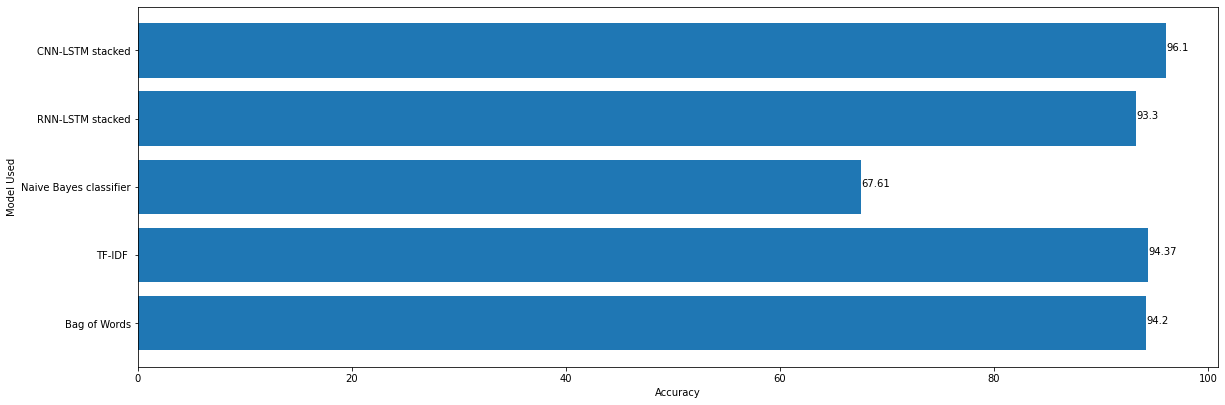

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
x = ['Bag of Words', 'TF-IDF ', 'Naive Bayes classifier', 'RNN-LSTM stacked', 'CNN-LSTM stacked']
y = [94.2,94.37,67.61,93.3,96.1]
ax.barh(x,y)
plt.ylabel('Model Used')
plt.xlabel('Accuracy')
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

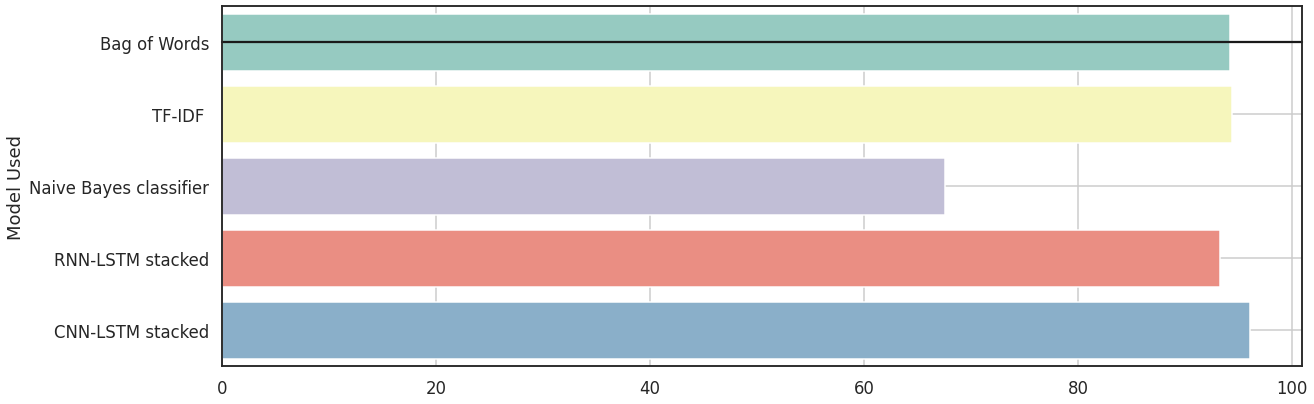

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=y, y=x,  ax=ax1,  palette="Set3")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

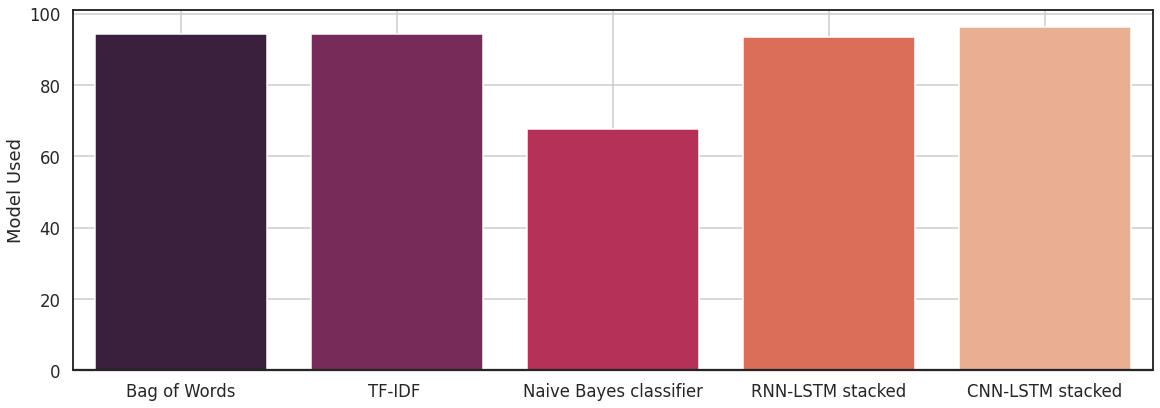

In [68]:
#palette=",
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=x, y=y,  ax=ax1,  palette="rocket")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

**END OF PROJECT**